In [1]:
import pandas as pd
df=pd.read_csv("Housing.csv")
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
list1=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [4]:
df[list1]=df[list1].replace({'yes':1,'no':0})

/tmp/ipython-input-2365513770.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[list1]=df[list1].replace({'yes':1,'no':0})


In [6]:
df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':0,'unfurnished':1,'semi-furnished':2})

/tmp/ipython-input-527181099.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':0,'unfurnished':1,'semi-furnished':2})


In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [11]:
from sklearn.preprocessing import StandardScalar

In [12]:
scalar = StandardScaler()

In [13]:
list2=['price','area']

In [15]:
df[list2]=scalar.fit_transform(df[list2])

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,2
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,0


In [22]:
df.dtypes

,0
price,float64
area,float64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
core=df.corr()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

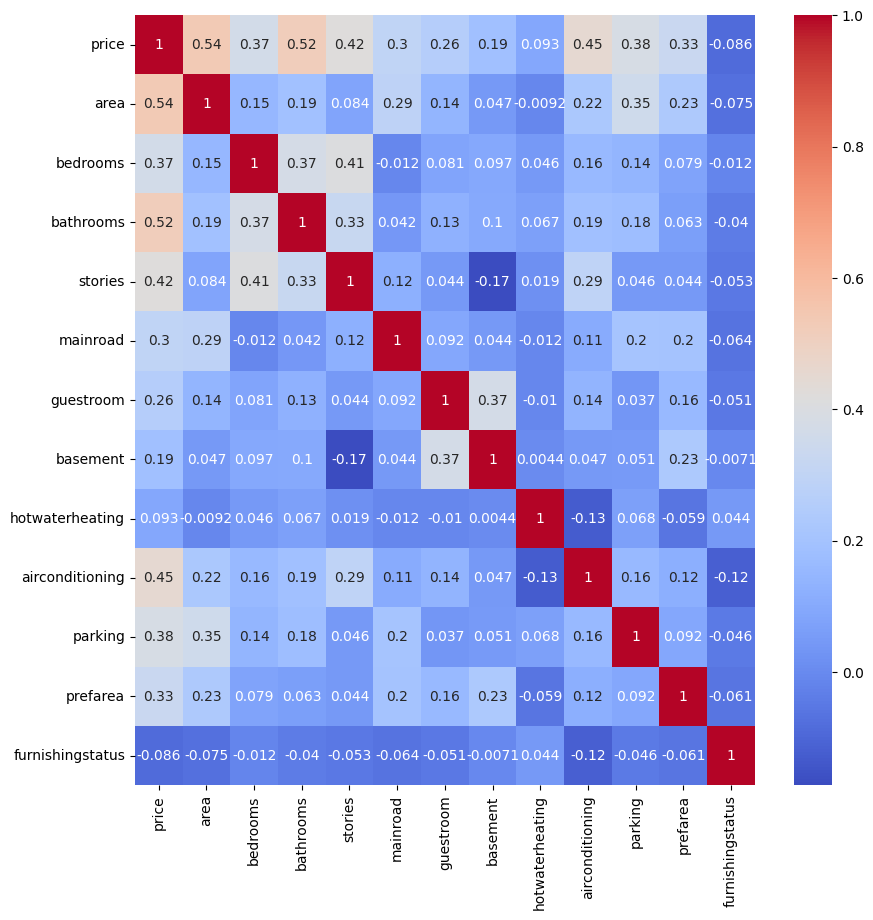

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(core,annot=True,cmap='coolwarm')
plt.show()

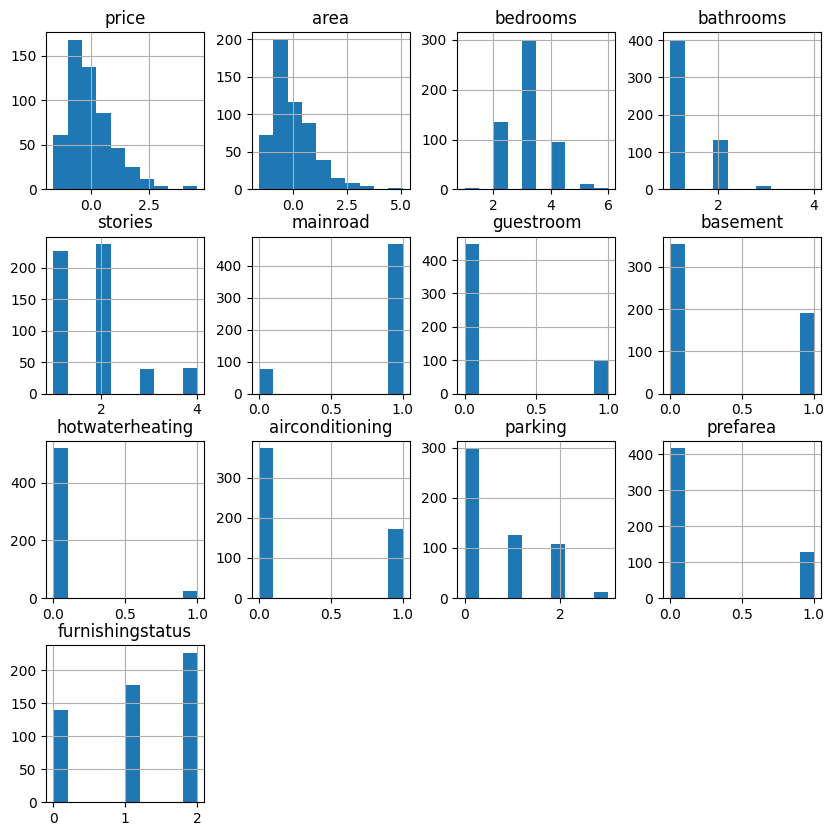

In [30]:
df.hist(figsize=(10,10),bins=10)
plt.show()

In [34]:
X=df.drop('price',axis=1)
y=df['price']

In [35]:
y

,price
0,4.566365
1,4.004484
2,4.004484
3,3.985755
4,3.554979
...,...
540,-1.576868
541,-1.605149
542,-1.614327
543,-1.614327


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (436, 12)
Shape of y_train: (109,)


In [45]:
y_predict=lr.predict(X_test)

In [46]:
from sklearn.metrics import r2_score

In [47]:
lr_accuracy=r2_score(y_test,y_predict)*100

In [48]:
lr_accuracy

64.23301504123721